# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_data = pd.merge(mouse_metadata, study_results, on="Mouse ID")

# Display the data table for preview
print(combined_data.head())

  Mouse ID Drug Regimen   Sex  Age_months  Weight (g)  Timepoint  \
0     k403     Ramicane  Male          21          16          0   
1     k403     Ramicane  Male          21          16          5   
2     k403     Ramicane  Male          21          16         10   
3     k403     Ramicane  Male          21          16         15   
4     k403     Ramicane  Male          21          16         20   

   Tumor Volume (mm3)  Metastatic Sites  
0           45.000000                 0  
1           38.825898                 0  
2           35.014271                 1  
3           34.223992                 1  
4           32.997729                 1  


In [7]:
# Checking the number of mice.
micecount = combined_data["Mouse ID"].nunique()

print(f"Number of unique mice: {micecount}")

Number of unique mice: 249


In [11]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicate_mice = combined_data[combined_data.duplicated(subset=["Mouse ID", "Timepoint"], keep=False)]

duplicate_mice_ids = duplicate_mice["Mouse ID"].unique()
print(f"Duplicate Mouse IDs: {duplicate_mice_ids}")

Duplicate Mouse IDs: ['g989']


In [13]:
# Optional: Get all the data for the duplicate mouse ID.
duplicate_mouse_data = combined_data[combined_data["Mouse ID"] == "g989"]

print(duplicate_mouse_data)

    Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
908     g989     Propriva  Female          21          26          0   
909     g989     Propriva  Female          21          26          0   
910     g989     Propriva  Female          21          26          5   
911     g989     Propriva  Female          21          26          5   
912     g989     Propriva  Female          21          26         10   
913     g989     Propriva  Female          21          26         10   
914     g989     Propriva  Female          21          26         15   
915     g989     Propriva  Female          21          26         15   
916     g989     Propriva  Female          21          26         20   
917     g989     Propriva  Female          21          26         20   
918     g989     Propriva  Female          21          26         25   
919     g989     Propriva  Female          21          26         30   
920     g989     Propriva  Female          21          26       

In [17]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
duplicate_mouse_id = "g989"

clean_data = combined_data[combined_data["Mouse ID"] != duplicate_mouse_id]


In [19]:
# Checking the number of mice in the clean DataFrame.

print(f"Number of unique mice after cleaning: {clean_data['Mouse ID'].nunique()}")

Number of unique mice after cleaning: 248


## Summary Statistics

In [25]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
grouped_data = clean_data.groupby("Drug Regimen")["Tumor Volume (mm3)"]

summary_stats = pd.DataFrame({
    "Mean": grouped_data.mean(),
    "Median": grouped_data.median(),
    "Variance": grouped_data.var(),
    "Standard Deviation": grouped_data.std(),
    "SEM": grouped_data.sem()
})

print(summary_stats)
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
# Assemble the resulting series into a single summary DataFrame.


                   Mean     Median   Variance  Standard Deviation       SEM
Drug Regimen                                                               
Capomulin     40.675741  41.557809  24.947764            4.994774  0.329346
Ceftamin      52.591172  51.776157  39.290177            6.268188  0.469821
Infubinol     52.884795  51.820584  43.128684            6.567243  0.492236
Ketapril      55.235638  53.698743  68.553577            8.279709  0.603860
Naftisol      54.331565  52.509285  66.173479            8.134708  0.596466
Placebo       54.033581  52.288934  61.168083            7.821003  0.581331
Propriva      52.320930  50.446266  43.852013            6.622085  0.544332
Ramicane      40.216745  40.673236  23.486704            4.846308  0.320955
Stelasyn      54.233149  52.431737  59.450562            7.710419  0.573111
Zoniferol     53.236507  51.818479  48.533355            6.966589  0.516398


In [29]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_stats_aggregate = clean_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(
    Mean="mean",
    Median="median",
    Variance="var",
    Standard_Deviation="std",
    SEM="sem"
)
print(summary_stats_aggregate)

                   Mean     Median   Variance  Standard_Deviation       SEM
Drug Regimen                                                               
Capomulin     40.675741  41.557809  24.947764            4.994774  0.329346
Ceftamin      52.591172  51.776157  39.290177            6.268188  0.469821
Infubinol     52.884795  51.820584  43.128684            6.567243  0.492236
Ketapril      55.235638  53.698743  68.553577            8.279709  0.603860
Naftisol      54.331565  52.509285  66.173479            8.134708  0.596466
Placebo       54.033581  52.288934  61.168083            7.821003  0.581331
Propriva      52.320930  50.446266  43.852013            6.622085  0.544332
Ramicane      40.216745  40.673236  23.486704            4.846308  0.320955
Stelasyn      54.233149  52.431737  59.450562            7.710419  0.573111
Zoniferol     53.236507  51.818479  48.533355            6.966589  0.516398


## Bar and Pie Charts

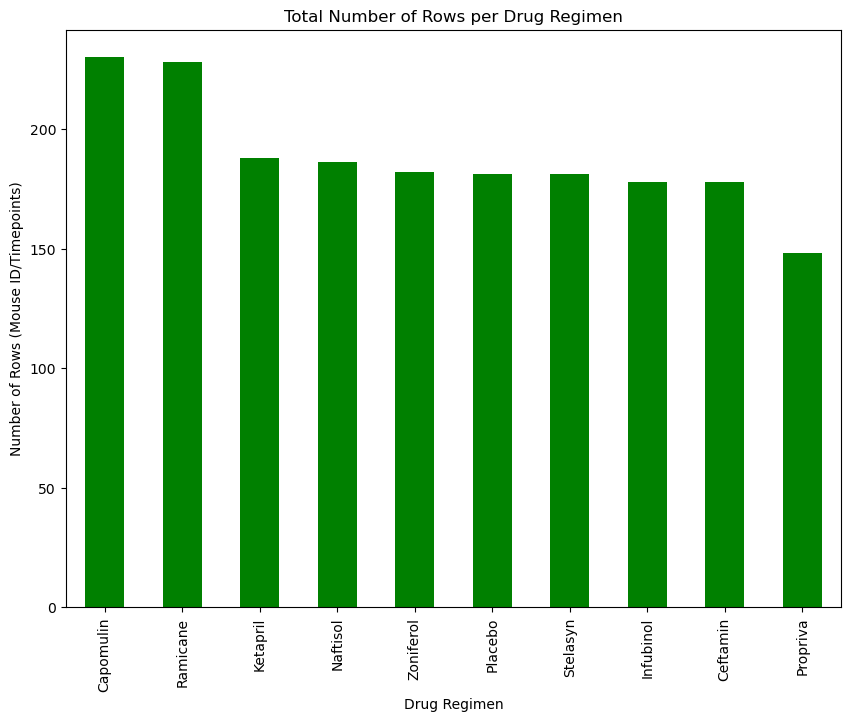

In [35]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
regimen_counts = clean_data["Drug Regimen"].value_counts()
regimen_counts.plot(kind="bar", figsize=(10,7.5), title="Total Number of Rows per Drug Regimen", color="green")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Rows (Mouse ID/Timepoints)")

plt.show()

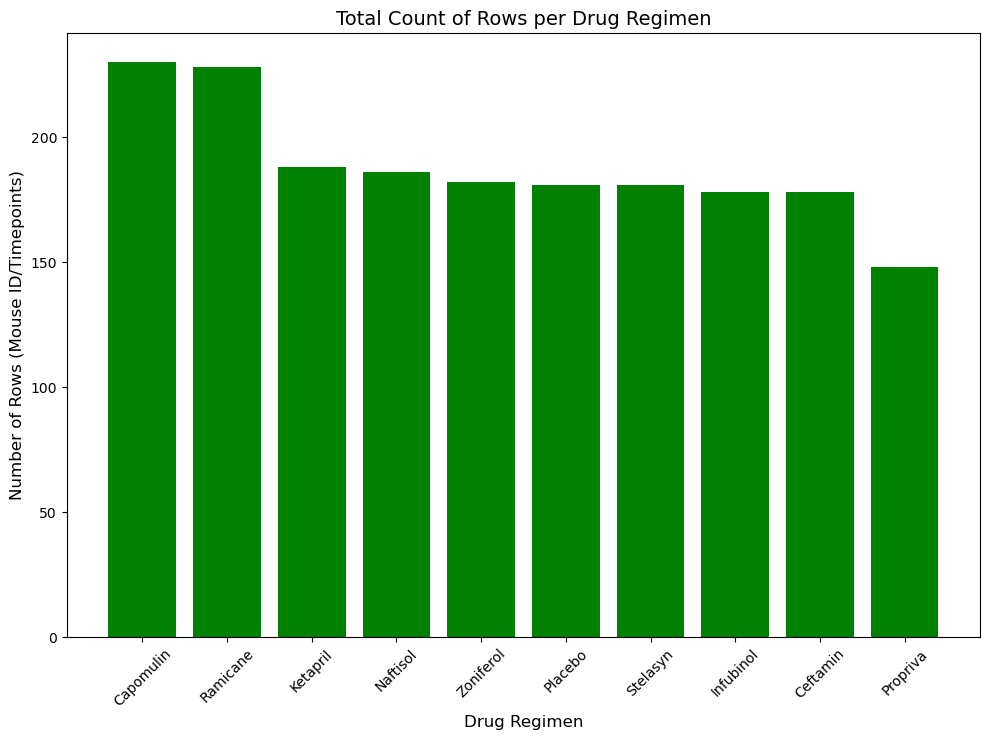

In [51]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
import matplotlib.pyplot as plt

regimen_counts = clean_data["Drug Regimen"].value_counts()
plt.figure(figsize=(10, 7.5))
plt.bar(regimen_counts.index, regimen_counts.values, color="green")

plt.title("Total Count of Rows per Drug Regimen", fontsize=14)
plt.xlabel("Drug Regimen", fontsize=12)
plt.ylabel("Number of Rows (Mouse ID/Timepoints)", fontsize=12)
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


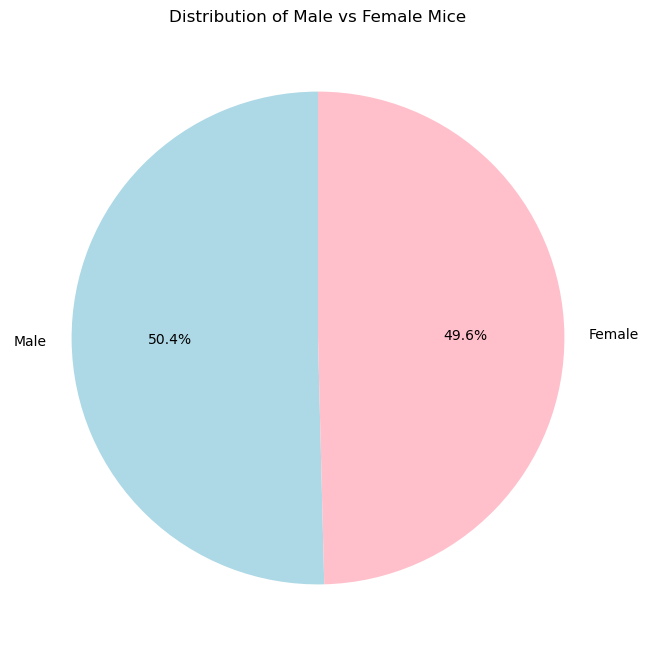

In [69]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study
# Get the unique mice with their gender
unique_mice = clean_data.drop_duplicates(subset=["Mouse ID"])
gender_counts = unique_mice["Sex"].value_counts()


# Make the pie chart
gender_counts.plot.pie(autopct="%1.1f%%",
                       startangle=90,
                       figsize=(8,8),
                       title="Distribution of Male vs Female Mice",
                       colors=["lightblue", "pink"],
                       ylabel="")

plt.show()


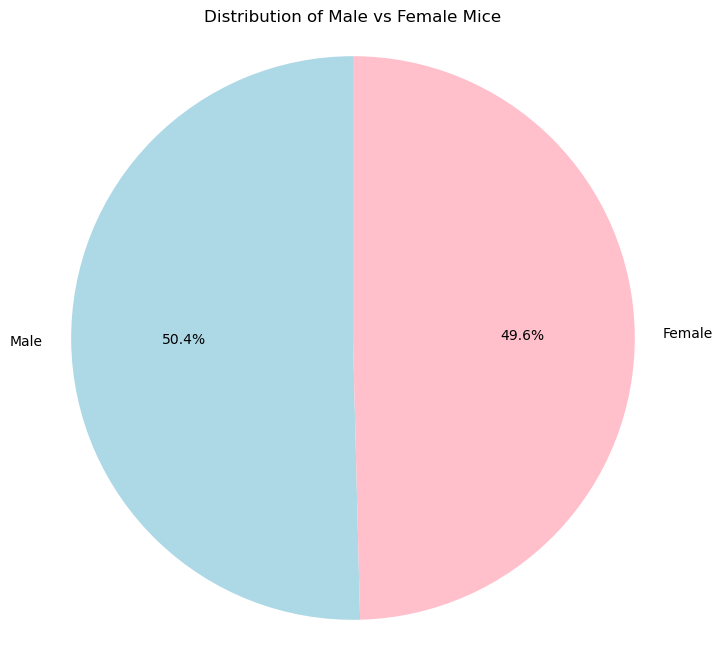

In [77]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender


# Make the pie chart

unique_mice = clean_data.drop_duplicates(subset=["Mouse ID"])
gender_counts = unique_mice["Sex"].value_counts()


# Make the pie chart
gender_counts.plot(kind="pie",
                   autopct="%1.1f%%",
                   startangle=90,
                   figsize=(8,8),
                   title="Distribution of Male vs Female Mice",
                   colors=["lightblue", "pink"])
plt.ylabel("")
plt.axis("Equal")
plt.show()


## Quartiles, Outliers and Boxplots

In [75]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin
treatment_data = clean_data[clean_data["Drug Regimen"].isin(["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])]
# Start by getting the last (greatest) timepoint for each mouse
last_timepoint = treatment_data.groupby("Mouse ID")["Timepoint"].max().reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_tumor_volume = pd.merge(last_timepoint, clean_data, on=["Mouse ID", "Timepoint"], how="left")

print(final_tumor_volume.head())


  Mouse ID  Timepoint Drug Regimen     Sex  Age_months  Weight (g)  \
0     a203         45    Infubinol  Female          20          23   
1     a251         45    Infubinol  Female          21          25   
2     a275         45     Ceftamin  Female          20          28   
3     a411         45     Ramicane    Male           3          22   
4     a444         45     Ramicane  Female          10          25   

   Tumor Volume (mm3)  Metastatic Sites  
0           67.973419                 2  
1           65.525743                 1  
2           62.999356                 3  
3           38.407618                 1  
4           43.047543                 0  


In [87]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
# Create empty list to fill with tumor vol data (for plotting)
tumor_volumes = []

for treatment in treatments:
    treatment_data = final_tumor_volume[final_tumor_volume["Drug Regimen"] == treatment]["Tumor Volume (mm3)"]


    
# Calculate the IQR and quantitatively determine if there are any potential outliers.
    quartiles = treatment_data.quantile([0.25, 0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq

    lower_bound = lowerq - (1.5* iqr)
    upper_bound = upperq + (1.5 * iqr)
                                                                          
    # Locate the rows which contain mice on each drug and get the tumor volumes


    # add subset
tumor_volumes.append(treatment_data)

    # Determine outliers using upper and lower bounds

outliers = treatment_data[(treatment_data < lower_bound ) | (treatment_data > upper_bound)]
print(outliers)

Series([], Name: Tumor Volume (mm3), dtype: float64)


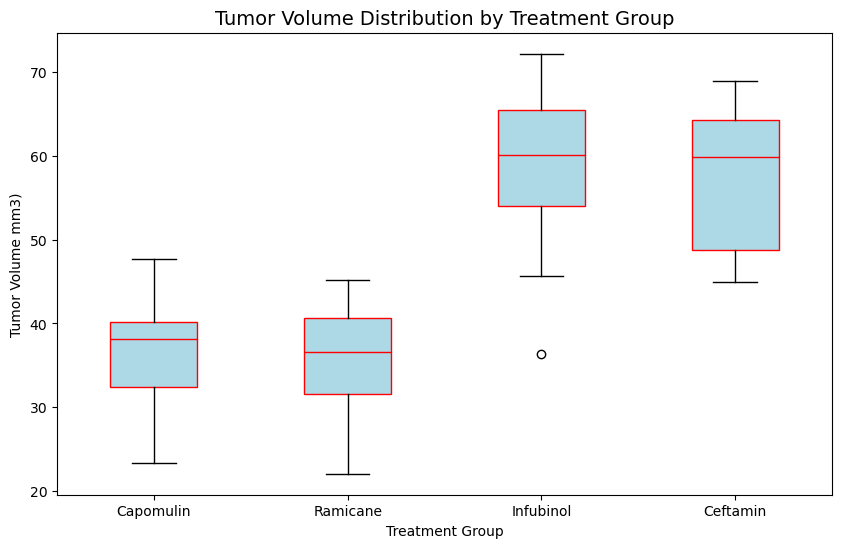

In [126]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.
import matplotlib.pyplot as plt

tumor_volumes = []

for treatment in treatments:
    treatment_data = final_tumor_volume[final_tumor_volume["Drug Regimen"] == treatment]["Tumor Volume (mm3)"]

    if not treatment_data.empty:
        tumor_volumes.append(treatment_data)

plt.figure(figsize=(10, 6))
plt.boxplot(tumor_volumes, labels=treatments,
patch_artist=True,
boxprops=dict(facecolor="lightblue", color="red"),
medianprops=dict(color="red"))

plt.title("Tumor Volume Distribution by Treatment Group", fontsize=14)
plt.xlabel("Treatment Group", fontsize=10)
plt.ylabel("Tumor Volume mm3)", fontsize=10)

plt.show()

## Line and Scatter Plots

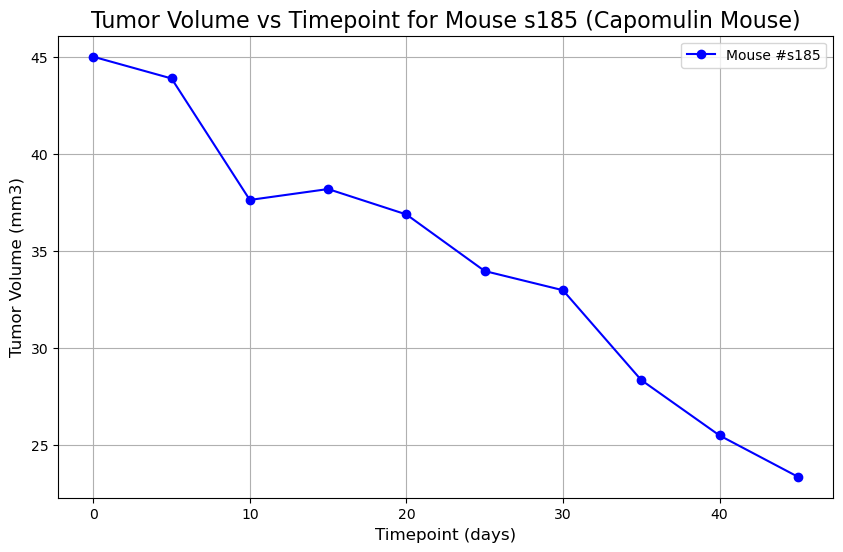

In [130]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
capomulin_mouse = clean_data[(clean_data["Drug Regimen"] == "Capomulin") & (clean_data["Mouse ID"] == "s185")]
    
plt.figure(figsize=(10,6))
plt.plot(capomulin_mouse["Timepoint"], capomulin_mouse["Tumor Volume (mm3)"], marker='o', color='blue', label="Mouse #s185")
plt.title("Tumor Volume vs Timepoint for Mouse s185 (Capomulin Mouse)", fontsize=16)
plt.xlabel("Timepoint (days)", fontsize=12)
plt.ylabel("Tumor Volume (mm3)", fontsize=12)
plt.legend()
plt.grid()
plt.show()
    

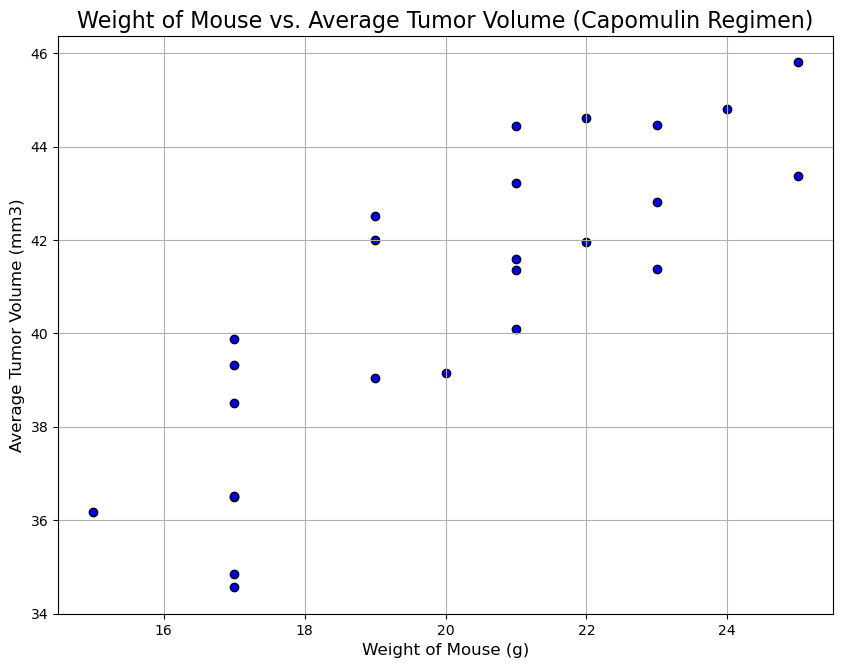

In [144]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_data = clean_data[clean_data["Drug Regimen"] == "Capomulin"].copy()

capomulin_data["Weight (g)"] = pd.to_numeric(capomulin_data["Weight (g)"], errors="coerce")
capomulin_data["Tumor Volume (mm3)"] = pd.to_numeric(capomulin_data["Tumor Volume (mm3)"], errors="coerce")
capomulin_data = capomulin_data.dropna(subset=["Weight (g)", "Tumor Volume (mm3)"])

capomulin_average_tumor_volume = capomulin_data.groupby("Mouse ID")[["Weight (g)", "Tumor Volume (mm3)"]].mean()

plt.figure(figsize=(10, 7.5))
plt.scatter(capomulin_average_tumor_volume["Weight (g)"], capomulin_average_tumor_volume["Tumor Volume (mm3)"],
                    color="blue", edgecolor="black")

plt.title("Weight of Mouse vs. Average Tumor Volume (Capomulin Regimen)", fontsize=16)
plt.xlabel("Weight of Mouse (g)", fontsize=12)
plt.ylabel("Average Tumor Volume (mm3)", fontsize=12)

plt.grid()
plt.show()

## Correlation and Regression

In [150]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
from scipy.stats import linregress

x_values = capomulin_average_tumor_volume["Weight (g)"]
y_values = capomulin_average_tumor_volume["Tumor Volume (mm3)"]

correlation = x_values.corr(y_values)
print(f"The correlation coefficient is {correlation:.2f}")

slope, intercept, r_value, p_value, std_err = linregress(x_values, y_values)

print(f"Linear regression formula: y = {slope:.2f}x + {intercept:.2f}")

regression_line = slope * x_values + intercept

plt.figure(figsize=(8, 6))
plt.scatter(x_values, y_values, color="green", edgecolor="black", label="Data Points")
p.t.plot(x_values, regression_line, color="red", label="Regression Line")

plt.title("Weight of Mouse (g) vs. Average Tumor Volume (Capomulin Regimen))", fontsize=16)
plt.xlabel("Weight of Mouse (g)", fontsize=12)
plt.ylabel("Average Tumor Volume (mm3)", fontsize=12)
plt.legend
plt.grid()
plt.show()

NameError: name 'y_values' is not defined